In [2]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mediapipe as mp

### reading and displaying of  an image

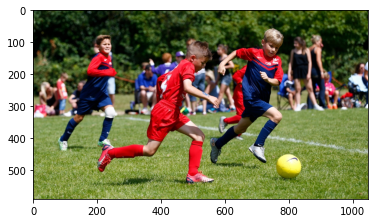

In [3]:
image=cv2.imread('3.jpg')
cv2.imshow('image',image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

### Rotating the image by  90 degrees clockwise

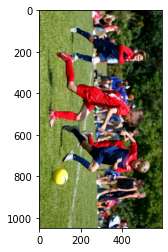

In [4]:
rotated_image=cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
cv2.imshow('Rotated image',rotated_image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(rotated_image,cv2.COLOR_BGR2RGB))
plt.show()

### Cropping of an image

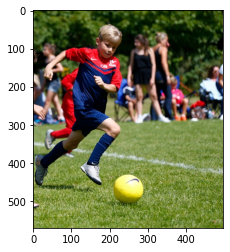

In [5]:
cropped_image=image[20:800,550:1100]

cv2.imshow('cropped image',cropped_image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))
plt.show()

### Resize the image a) reduce the size with row and column length  
###                               b) with axis values 

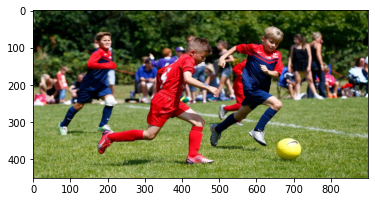

In [6]:
resize_a=cv2.resize(image,(900,450),interpolation=cv2.INTER_AREA)

cv2.imshow('resize a image',resize_a)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(resize_a,cv2.COLOR_BGR2RGB))
plt.show()

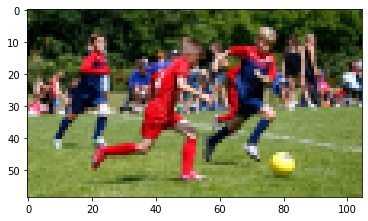

In [7]:
resize_b=cv2.resize(image,(0,0),fx=0.1,fy=0.1,interpolation=cv2.INTER_AREA)

cv2.imshow('resize b image',resize_b)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(resize_b,cv2.COLOR_BGR2RGB))
plt.show()

### Adjust Image Contrast

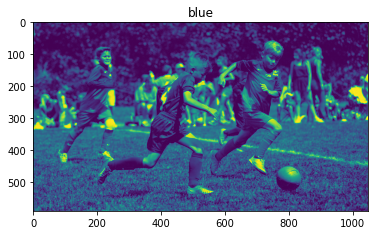

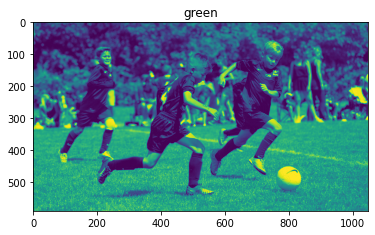

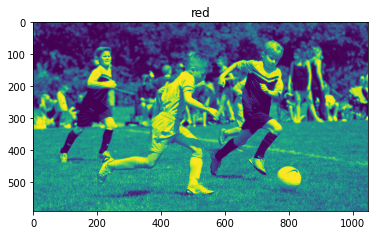

In [8]:
b,g,r=cv2.split(image)
cv2.imshow('blue',b)
cv2.imshow('green',g)
cv2.imshow('red',r)
cv2.waitKey(0)

plt.imshow(b)
plt.title('blue')
plt.show()

plt.imshow(g)
plt.title('green')
plt.show()

plt.imshow(r)
plt.title('red')
plt.show()

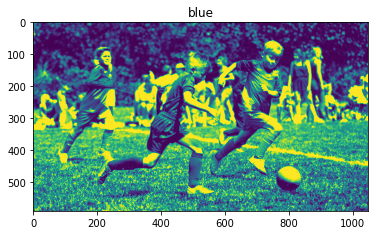

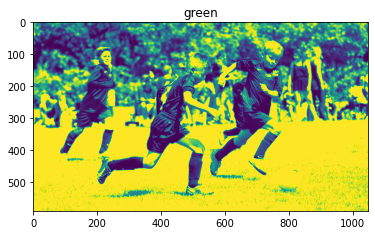

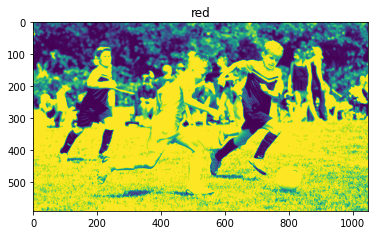

In [9]:
new_b=cv2.convertScaleAbs(b,alpha=2,beta=0)
new_g=cv2.convertScaleAbs(g,alpha=2,beta=0)
new_r=cv2.convertScaleAbs(r,alpha=2,beta=0)

cv2.imshow('blue',new_b)
cv2.imshow('green',new_g)
cv2.imshow('red',new_r)
cv2.waitKey(0)

plt.imshow(new_b)
plt.title('blue')
plt.show()

plt.imshow(new_g)
plt.title('green')
plt.show()

plt.imshow(new_r)
plt.title('red')
plt.show()

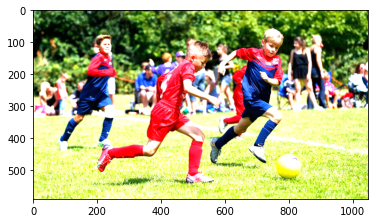

In [10]:
merged=cv2.merge([new_b,new_g,new_r])
cv2.imshow("merged", merged)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(merged,cv2.COLOR_BGR2RGB))
plt.show()

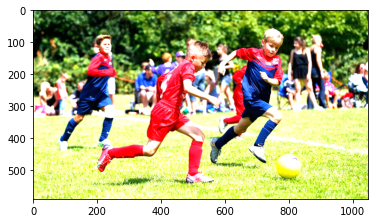

In [11]:
contrasted_image=cv2.convertScaleAbs(image,alpha=2,beta=0)

cv2.imshow("contrasted image", contrasted_image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(contrasted_image,cv2.COLOR_BGR2RGB))
plt.show()

### Blur the image a) Gaussian/Median Blur (blur the image by 50%)

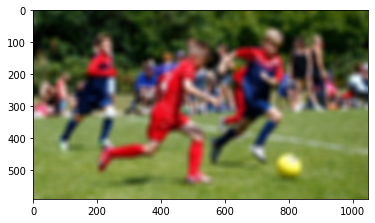

In [12]:
gaussian_blur=cv2.GaussianBlur(image,(25,25),10,10)

cv2.imshow("Gaussian blur", gaussian_blur)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(gaussian_blur,cv2.COLOR_BGR2RGB))
plt.show()

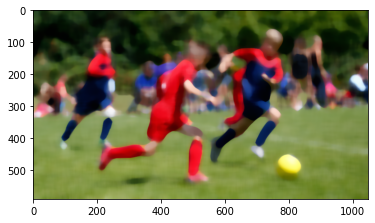

In [13]:
median_blur=cv2.medianBlur(image,25)

cv2.imshow("median blur", median_blur)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(median_blur,cv2.COLOR_BGR2RGB))
plt.show()

### Detect the edges (Canny Edge Detector) 

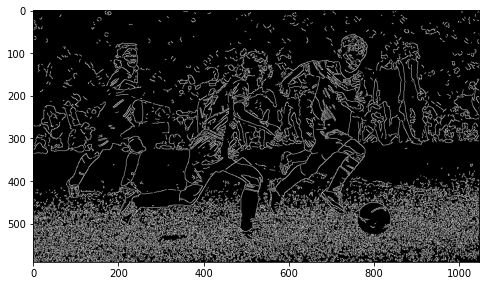

In [14]:
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blur_image=cv2.GaussianBlur(gray_image,(25,25),0,0)
canny_image=cv2.Canny(gray_image,125,160)

cv2.imshow('canny',canny_image)
cv2.waitKey(0)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(canny_image,cv2.COLOR_BGR2RGB))
plt.show()

### Convert image to grayscale (Black & White)

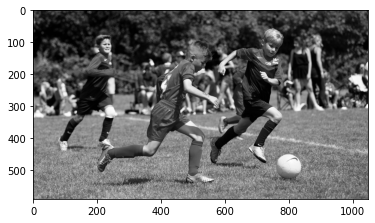

In [15]:
grayscale_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

cv2.imshow('gray',grayscale_image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(grayscale_image,cv2.COLOR_BGR2RGB))
plt.show()

### Centroid (Centre of blob) detection using Moment

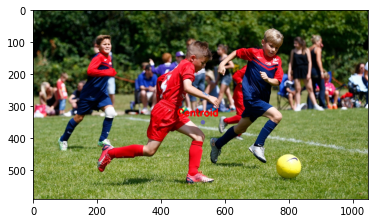

In [16]:
#ret,thresh=cv2.threshold(grayscale_image,140,255,cv2.THRESH_BINARY)

moments=cv2.moments(grayscale_image)

cx=int(moments['m10']/moments['m00'])
cy=int(moments['m01']/moments['m00'])

cv2.circle(image,(cx,cy),7,(170,100,100),-1)

cv2.putText(image,'Centroid',(cx-80,cy-20),cv2.FONT_ITALIC,1,(0,0,250),4)

cv2.imshow('centroid',image)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

### Apply a mask for a coloured image

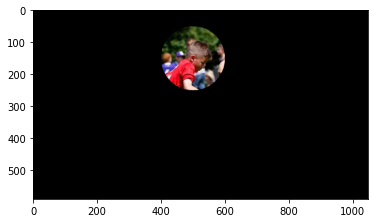

In [22]:
image1=cv2.imread('3.jpg')

mask=np.zeros(image1.shape[:2],dtype='uint8')

cv2.circle(mask,(500,150),100,255,-1)

masked=cv2.bitwise_and(image1,image1,mask=mask)

cv2.imshow('masked',masked)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(masked,cv2.COLOR_BGR2RGB))
plt.show()

### Color detection

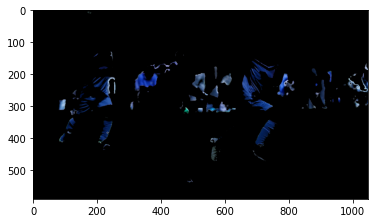

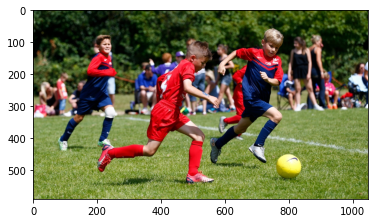

In [23]:
hsv=cv2.cvtColor(image1,cv2.COLOR_BGR2HSV)

lower_red=np.array([80,50,50])
higher_red=np.array([120,255,255])

mask=cv2.inRange(hsv,lower_red,higher_red)

blue_color=cv2.bitwise_and(image1,image1,mask=mask)


cv2.imshow('blue colored',blue_color)
cv2.imshow('original',image1)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(blue_color,cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB))
plt.show()

### Reduce Noise

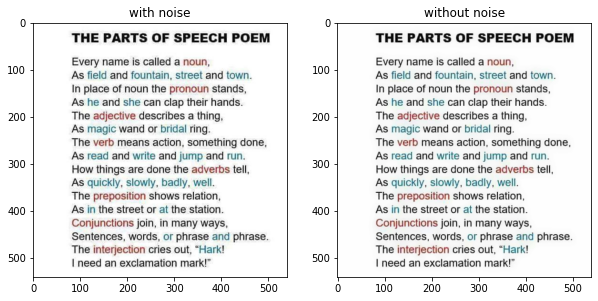

In [24]:
image2=cv2.imread('text-1.jpg')

without_noise=cv2.fastNlMeansDenoisingColored(image2,3,11,1,1)

cv2.imshow('with noise',image2)
cv2.imshow('without noise',without_noise)
cv2.waitKey(0)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
plt.title('with noise')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(without_noise,cv2.COLOR_BGR2RGB))
plt.title('without noise')
plt.show()

### Get image contour

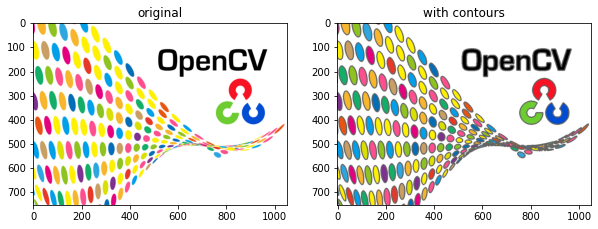

In [25]:
img=cv2.imread('Image1.png')
cv2.imshow('original',img)

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('original')

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray,220,255,cv2.THRESH_BINARY)

canny=cv2.Canny(thresh,50,60)

contour,hierarchies=cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img,contour,-1,(100,100,100),3)

cv2.imshow('with contours',img)
cv2.waitKey(0)

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('with contours')
plt.show()

### Remove Background from an image

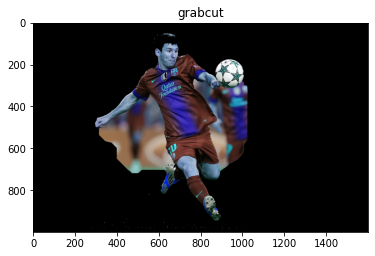

In [27]:
img_1 = cv2.imread('2.jpg',cv2.IMREAD_COLOR)

mask = np.zeros(img_1.shape[:2], np.uint8)

#background & foreground are based on rect 
bgModel = np.zeros((1,65), np.float64)
fgModel = np.zeros((1,65), np.float64)

rect = (275,30,750,1000)


cv2.grabCut(img_1, mask, rect, bgModel, fgModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2)| (mask == 0), 0,1).astype('uint8')
img_1 = img_1*mask2[:,:,np.newaxis]



cv2.imshow('image',img_1)
cv2.waitKey(0)

plt.title('grabcut')
plt.imshow(img_1)
plt.show()

### 16.Scan Copy:
Read the text image and create a scan copy of the given image 

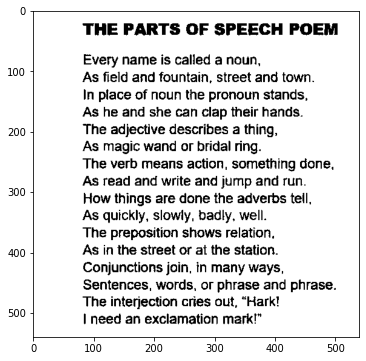

In [28]:
image2=cv2.imread('text-1.jpg')

without_noise=cv2.fastNlMeansDenoisingColored(image2,7,21,1,1)

gray_image=cv2.cvtColor(without_noise,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray_image,200,255,cv2.THRESH_BINARY)


cv2.imshow('scanned copy',thresh)
cv2.waitKey(0)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(thresh,cv2.COLOR_BGR2RGB))
plt.show()

### 17. FaceDetection:
Write a code to capture a video and detect facial landmarks from the frames and
create a blank video to plot those facial landmarks

In [22]:
mpDraw=mp.solutions.drawing_utils
mpFaceMesh=mp.solutions.face_mesh
faceMesh=mpFaceMesh.FaceMesh(max_num_faces=2,min_detection_confidence=0.5,min_tracking_confidence=0.5)
drawingspecs=mpDraw.DrawingSpec(thickness=2,circle_radius=1,color=(0,255,0))
capture=cv2.VideoCapture(0)
while(capture.isOpened()):
    ret,frame=capture.read()
    blank=np.zeros(frame.shape,np.uint8)
    results=faceMesh.process(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        for lms in results.multi_face_landmarks:
            mpDraw.draw_landmarks(frame,lms,mpFaceMesh.FACEMESH_CONTOURS,drawingspecs,drawingspecs)
            mpDraw.draw_landmarks(blank,lms,mpFaceMesh.FACEMESH_CONTOURS,drawingspecs,drawingspecs)

    if ret:
        cv2.imshow('face',frame)
        cv2.imshow('blank',blank)
        if cv2.waitKey(1)& 0xFF==ord('q') or frame.size==0:
            break
    else:
        break
capture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 